### OpenCV(Open Source Computer Vision) 개요
- Computer Vision : 사람의 시각적인 부분을 기계로 구현하는 것을 목적으로 하는 딥러닝 분야
- OpenCV : 이미지, 동영상 등의 처리를 지원하는 라이브러리
    - C++로 제작되어 있고, Java, JS, Android, Python 등 다양한 언어에서 활용가능
    - 특히 파이썬에서 사용할 경우 Numpy, Matplotlib 등의 라이브러리에서 바로 연동 가능

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

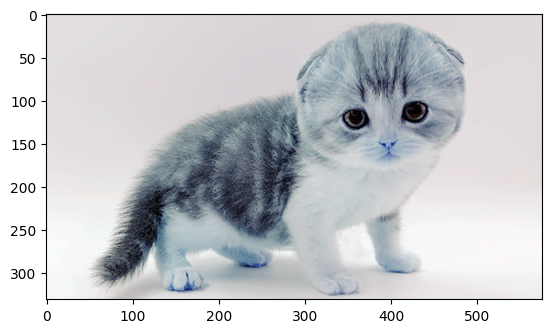

In [6]:
cat = cv2.imread('image/cat.png')
plt.imshow(cat)

In [7]:
cat

array([[[222, 222, 222],
        [231, 222, 231],
        [231, 222, 222],
        ...,
        [222, 222, 222],
        [222, 214, 222],
        [231, 222, 222]],

       [[231, 222, 222],
        [231, 222, 222],
        [222, 222, 222],
        ...,
        [222, 214, 222],
        [231, 222, 222],
        [222, 214, 222]],

       [[231, 222, 222],
        [231, 222, 231],
        [231, 222, 222],
        ...,
        [222, 214, 222],
        [222, 222, 222],
        [222, 214, 214]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [239, 239, 239],
        [239, 231, 239],
        [239, 239, 230]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [239, 239, 239],
        [239, 231, 231],
        [239, 239, 239]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [239, 239, 239],
        [239, 231, 239],
        [239, 239, 230]]

### OpenCV의 색상 체계
- 일반적인 이미지를 matplotlib으로 출력시 RGB 색상 체계를 사용
- OpenCV는 BGR 색상 체계 사용
- 그래서 RGB이미지를 cv2로 불러와서 matplotlib으로 출력하면 Red계열 색상이 Blue계열 색상으로 변경되어 출력
- 초창기에는 알파벳 순서대로 BGR로 표현했고, 이후에 색상 주파수에 낮은 순서대로 바뀌어서 대중적으로 RGB로 사용
- OpenCV에는 RGB이미지를 그대로 표현하려면 BGR로 변환시켜서 출력해야함

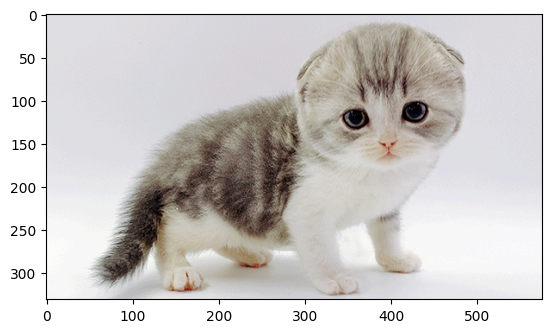

In [8]:
cat = cv2.imread('image/cat.png')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

plt.imshow(cat)

In [9]:
cat

array([[[222, 222, 222],
        [231, 222, 231],
        [222, 222, 231],
        ...,
        [222, 222, 222],
        [222, 214, 222],
        [222, 222, 231]],

       [[222, 222, 231],
        [222, 222, 231],
        [222, 222, 222],
        ...,
        [222, 214, 222],
        [222, 222, 231],
        [222, 214, 222]],

       [[222, 222, 231],
        [231, 222, 231],
        [222, 222, 231],
        ...,
        [222, 214, 222],
        [222, 222, 222],
        [214, 214, 222]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [239, 239, 239],
        [239, 231, 239],
        [230, 239, 239]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [239, 239, 239],
        [231, 231, 239],
        [239, 239, 239]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [239, 239, 239],
        [239, 231, 239],
        [230, 239, 239]]

In [10]:
print(cat.shape)
print(cat.size)
print(cat.dtype) # uint : unsigned integer 부호가 없는 정수

(331, 576, 3)
571968
uint8


### 이미지 색상 종류
- 컬러 이미지(RGB)
- 흑백 이미지(Gray) -> 0 ~ 255 사이의 흑백 픽셀값으로 구성된 이미지
    - 컬러 이미지는 용량이 크고 연산량이 많기 때문에 이를 간소화 시켜 처리하기 위해서 흑백 이미지를 사용
- 이진 이미지(binary) -> 0과 255 두가지 값으로만 구성된 이미지
    - 배경과 객체를 잘 구분
    - 관심 영역과 비관심 영역을 구분
    - 필터를 만들거나 단순 이미지 처리하는 경우에 사용

- 1. 기존 컬러 이미지를 Gray로 받아주고 출력할때도 gray로 설정해줘야 함

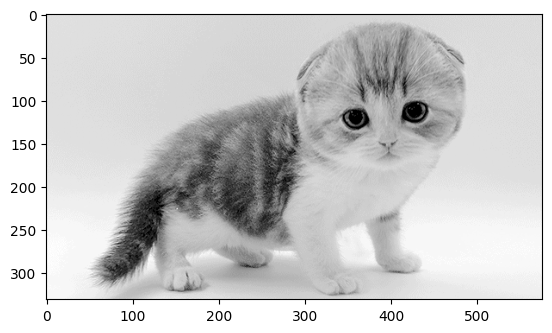

In [14]:
cat_gray = cv2.imread('image/cat.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(cat_gray, cmap='gray')

- 2. 컬러 이미지를 그대로 불러서 cvtColor를 통해 gray로 변환 후 출력

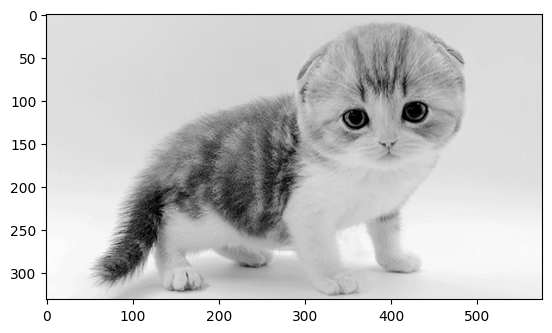

In [20]:
cat2 = cv2.imread('image/cat.png')
cat2_gray = cv2.cvtColor(cat2, cv2.COLOR_BGR2GRAY)

plt.imshow(cat2_gray, cmap='gray')

#### 이진(binary) 이미지 만들기
- 기존 이미지가 컬러 이미지라면 gray이미지로 변환 후 이진으로 바꿔줘야 함

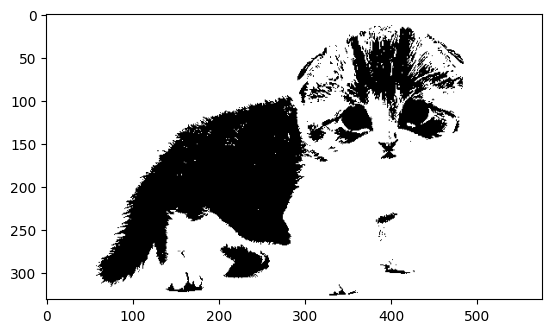

In [31]:
# threshold(문턱값 ,경계값) : 특정 기준값을 통해서 데이터를 변환해주는 함수
# (이미지, 경계기준값, 경계값보다 클때 적용되는 값, 경계값 적용방식)
_, bi_cat = cv2.threshold(cat2_gray, 165, 255, cv2.THRESH_BINARY)

# _ : 첫번째 리턴 값은 받지 않음(threshold함수는 두 가지 값이 리턴됨)
# 리턴 값의 첫 번째는 경계값 수치, 두 번째는 경계값 기준이 적용된 이미지

plt.imshow(bi_cat, cmap='gray')

In [30]:
temp, bi_cat = cv2.threshold(cat2_gray, 140, 255, cv2.THRESH_BINARY)
temp

140.0

#### cv2.threshold(img, threshold_value, value, flag)
- img : gray 이미지
- threshold_value : 경계 기준값
- value : 경계값보다 클 때 적용되는 값
- flag : 경계값 적용 방식
    - cv2.THRESH_BINARY : 픽셀값이 경계값보다 크면 value, 아니면 0을 할당(흰색 or 검은색으로만 표시)
    - cv2.THRESH_BINARY_INV : 픽셀값이 경계값보다 크면 0, 아니면 value 할당
    - cv2.THRESH_TRUNC : 픽셀값이 경계값보다 크면 경계값, 아니면 픽셀값 할당
    - cv2.THRESH_TOZERO : 픽셀값이 경계값보다 크면 픽셀값, 아니면 0을 할당(검은색 부각)
    - cv2.THRESH_TOZERO_INV : 픽셀값이 경계값보다 크면 0, 아니면 픽셀값 할당

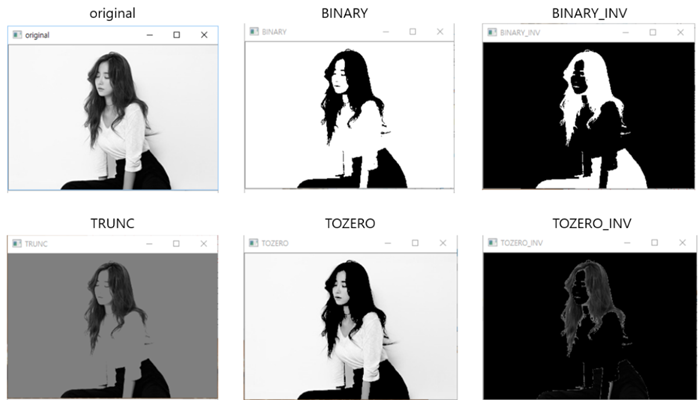

#### 동영상 혹은 카메라(웹 캠)불러오기

In [33]:
# 영상에 있는 프레임 출력해보기
'''영상을 다룰떄는 연속된 프레임을 실시간으로 처리해주기 때문에 제대로 동작하지 않았을 경우에
대한 예외처리를 해주는 것이 오류로 인한 중단을 방지하거나 오류의 위치를 파악함에 있어서 유리함'''

# 코드 실행에 문제가 없을 경우
try : 
    # 1) 카메라(웹캠)으로부터 캡처(일반적을 내장 카메라는 0번으로 인식)
    cap = cv2.VideoCapture(0)
    print('비디오 캡처 성공^_^')
# 코드 실행에 문제가 생길 경우
except : 
    print('비디오 캡처 실패 ㅠㅠ')
    
# 2. 캡쳐해온 프레임을 읽고 출력시키기
# read : 캡쳐한 이미지 프레임을 한 장씩 읽어옴
# ret : 읽기 성공여부(True, False)
# frame : 실제 이미지의 배열 데이터
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

비디오 캡처 성공^_^


읽기 성공 여부 True
프레임 shape (480, 640, 3)
[[[ 45  47  44]
  [ 44  49  47]
  [ 40  47  48]
  ...
  [104 104 104]
  [101 101 103]
  [ 99  99 101]]

 [[ 45  47  47]
  [ 45  48  50]
  [ 43  47  51]
  ...
  [103 104 104]
  [101 103 102]
  [101 103 102]]

 [[ 47  46  49]
  [ 46  48  50]
  [ 42  46  48]
  ...
  [ 97 104 103]
  [ 99 106 105]
  [101 108 106]]

 ...

 [[ 15  18  10]
  [ 16  19  12]
  [ 16  18  13]
  ...
  [124 125 125]
  [141 141 141]
  [136 136 136]]

 [[ 17  18  11]
  [ 19  18  12]
  [ 18  16  12]
  ...
  [131 126 127]
  [140 133 135]
  [130 123 125]]

 [[ 17  18  11]
  [ 17  18  12]
  [ 17  18  13]
  ...
  [ 80  72  73]
  [107 100 101]
  [107 100 101]]]


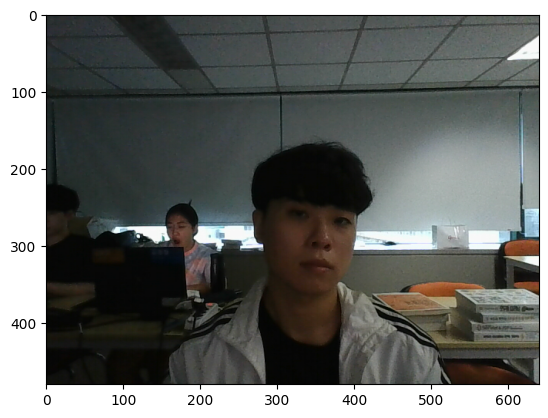

In [39]:
print('읽기 성공 여부', ret)
print('프레임 shape', frame.shape)
print(frame)
plt.imshow(frame)/

In [40]:
cap.release()